In [216]:
# 모듈 불러오기
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, wilcoxon, ttest_rel
from scipy.stats import levene, ttest_ind

In [217]:
# 데이터 불러오기 - iris
iris = pd.read_csv('./Data/iris.csv')

# 일표본 T-검정

In [218]:
# 정규성 검정 - 샤피로-윌크 검정
# 귀무가설 : 데이터가 정규분포를 따른다.
# 대립가설 : 데이터가 정규분포를 따르지 않는다.
col = iris.columns[0]
shapiro(iris[col])

ShapiroResult(statistic=0.9760899543762207, pvalue=0.010180278681218624)

In [219]:
# 샤피로-윌크 검정 결과
# p-value = 0.01 < 0.05 => 귀무가설을 기각하고 대립가설을 채택

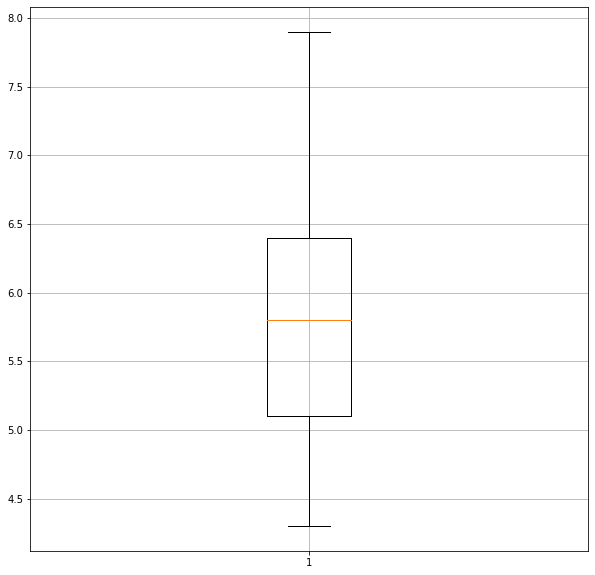

In [220]:
# Boxplot 그려보기
plt.figure(figsize = (10,10))
plt.boxplot(iris['sepal_length'])
plt.grid()
plt.show()

In [221]:
# 정규성을 만족하지 않기 때문에 윌콕슨 검정 실시
wilcoxon(iris[col]- np.mean(iris[col]))

WilcoxonResult(statistic=5621.0, pvalue=0.9379223260259085)

In [222]:
# p-value = 0.93 > 0.05 이므로 귀무가설을 기각하지 못한다.

In [223]:
# 정규성 검정 - 샤피로-윌크 검정
# 귀무가설 : 데이터가 정규분포를 따른다.
# 대립가설 : 데이터가 정규분포를 따르지 않는다.
col = iris.columns[1]
shapiro(iris[col])

ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)

In [224]:
# 샤피로-윌크 검정 결과
# p-value = 0.07 > 0.05 => 귀무가설을 기각하지 못한다.

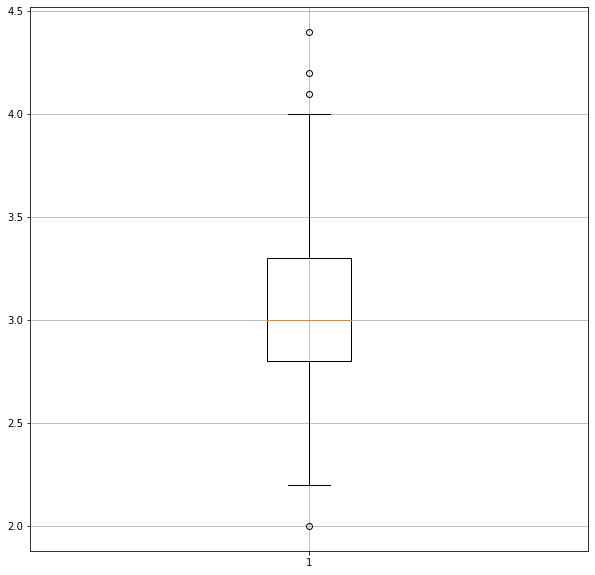

In [225]:
# Boxplot 그려보기
plt.figure(figsize = (10,10))
plt.boxplot(iris[col])
plt.grid()
plt.show()

In [226]:
# 정규성을 만족하므로 일표본 t-test 검정 실시
ttest_1samp(iris[col],popmean =  3.25)

Ttest_1sampResult(statistic=-5.536281000518977, pvalue=1.3585471983266516e-07)

In [227]:
# p-value = 1.35 * e-7 < 0.05이므로 귀무가설을 기각하고 대립가설을 채택

# 대응표본 T-검정

In [228]:
# 예제 데이터 만들기
df_example = pd.DataFrame(
    data = {
        'before' : [7,3,4,5,2,1,6,6,5,4],
        'after' : [8,4,5,6,2,3,6,8,6,5]
    }
)

In [229]:
# 데이터 확인
df_example

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [230]:
# 데이터 정규성 검사
# 샤피로 - 윌크 검사
col1 = df_example.columns[0]
col2 = df_example.columns[1]
shapiro(df_example[col1]), shapiro(df_example[col2])

(ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574),
 ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687))

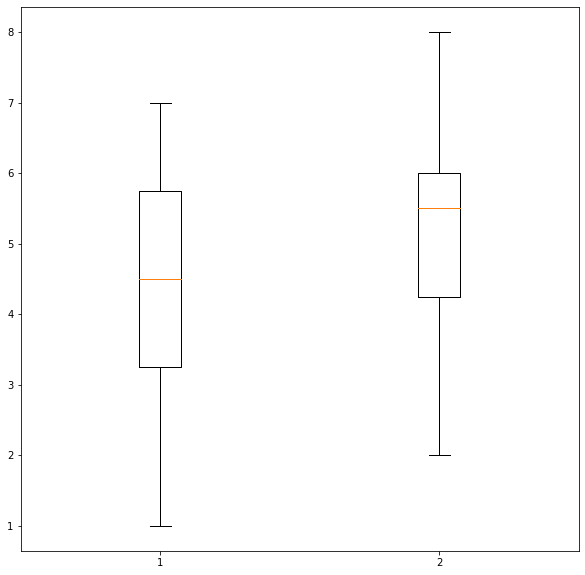

In [231]:
# Boxplot 그려보기
plt.figure(figsize = (10,10))
plt.boxplot([df_example[col1], df_example[col2]])
plt.show()

In [232]:
# p-value = 0.83, 0.61 > 0.05 => 귀무가설을 기각하지 못한다.
# 두 컬럼데이터 모두 정규성을 만족한다

In [233]:
# 대응표본 t-test 실시
ttest_rel(df_example[col1], df_example[col2])

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

# 대응표본 T-검정 -> 일표본 T-검정으로 전환

In [234]:
# 데이터 프레임 변환
df_example['difference'] = df_example['after'] - df_example['before']

In [235]:
# 데이터 확인
df_example

,before,after,difference
0,7,8,1
1,3,4,1
2,4,5,1
3,5,6,1
4,2,2,0
5,1,3,2
6,6,6,0
7,6,8,2
8,5,6,1
9,4,5,1


In [236]:
# before와 after의 차이를 정의하고 평균을 0이라 할 수 있다.

In [237]:
# 데이터 정규성 검사
shapiro(df_example['difference'])

ShapiroResult(statistic=0.8148398399353027, pvalue=0.021947871893644333)

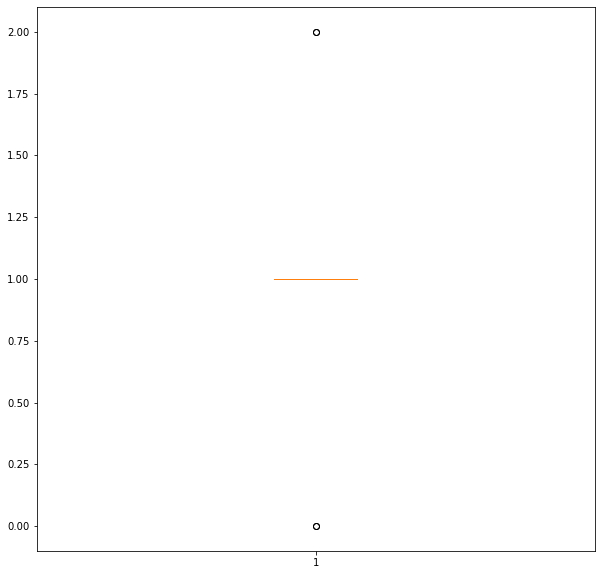

In [238]:
# boxplot 그려보기
plt.figure(figsize = (10,10))
plt.boxplot(df_example['difference'])
plt.show()

In [239]:
# 데이터 정규성을 만족하지 않으므로 윌콕슨 검정 실시
wilcoxon(df_example['difference'] - 0)

C:\Users\bcduc\anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\bcduc\anaconda3\lib\site-packages\scipy\stats\morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

In [240]:
# p-value = 0.0082 < 0.05 귀무가설을 기각하고 대립가설을 채택한다.

# 독립표본 T-검정

In [241]:
# iris 데이터에서 2가지 class만 사용 한다
# Iris-setosa, Iris-virginica
iris_seto_virgi = iris[iris['class'].isin(['Iris-virginica']) | iris['class'].isin(['Iris-setosa'])]
iris_two = iris_seto_virgi[['sepal_length', 'sepal_width','class']]

In [242]:
# 데이터 확인하기
iris_two

,sepal_length,sepal_width,class
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [243]:
# 데이터 정의
col1 = iris_two[iris_two['class']== 'Iris-setosa' ]['sepal_length']
col2 = iris_two[iris_two['class']== 'Iris-virginica' ]['sepal_length']

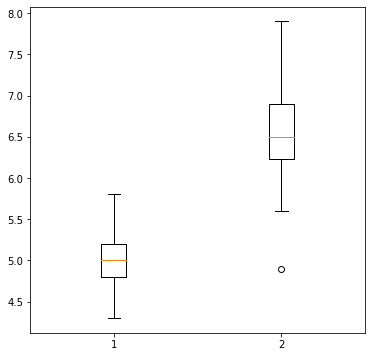

In [244]:
# 박스플롯 확인하기
plt.figure(figsize = (6,6))
plt.boxplot([col1, col2])
plt.show()

In [245]:
# 정규성 검사 - 샤피로 - 윌크 검정
shapiro(col1), shapiro(col2)

(ShapiroResult(statistic=0.9776989221572876, pvalue=0.4595281183719635),
 ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687))

In [246]:
# p-value = 0.459 , 0.258 > 0.05 => 귀무가설을 기각하지 못한다.
# 데이터 정규성 만족

In [248]:
# 등분산성 검정
levene(col1, col2)

LeveneResult(statistic=11.454002162818494, pvalue=0.0010271363228426178)

In [ ]:
# p-value = 0.001 < 0.05 => 귀무가설을 기각하고 대립가설 채택
# 등분산성을 만족하지 못한다.

In [249]:
# 독립표본 t-test 수행
ttest_ind(col1, col2, equal_var=False)

Ttest_indResult(statistic=-15.386195820079404, pvalue=3.9668672709859296e-25)